# Task-1



# Prediction Using Supervised ML

# Author : Rishal

# Problem Statement - Prediction of student's percentage based on the number of study hours

# 1. Import The Required Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting our dataset on 2-d plane.

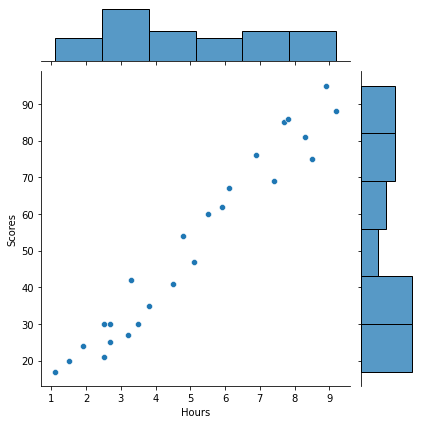

In [4]:
sns.jointplot(x = 'Hours', y = 'Scores', data  = df, kind = 'scatter')

### Preparing the data, divide it in input and output form

In [5]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Splitting the data into Train Test Split

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [7]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

### training the algorithm

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

### Validating OLS Assumptions

In [9]:
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

NameError: name 'y_pred' is not defined

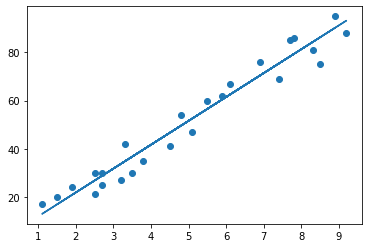

In [10]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Model evaluation metrics for train and test data

In [11]:
y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [12]:
y_pred = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


Mean Absolute Error: 5.186601709180368
Mean Squared Error: 30.89818237731452
Root Mean Squared Error: 5.558613350226342


#### Here we can clearly see that there is not much of a difference between RMSE of Train and Test  that means our model fits properly and it is generalizable

In [13]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred))


Mean Absolute percentage error: 11.808542728046579


In [15]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred1))


Mean Absolute percentage error: 12.568891617045663


### Actuals Vs Predicted values

In [16]:
y_pred = regressor.predict(X_train)
y_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [34]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

,Actual,Predicted
0,35,39.678655
1,24,20.848407
2,86,79.321281
3,76,70.401690
4,17,12.919882
5,47,52.562508
6,85,78.330215
7,42,34.723326
8,81,84.276609
9,88,93.196200


## Final prediction

In [17]:
print("If a student studies for 9.25 hours scores will be:",regressor.predict([[9.25]]))

If a student studies for 9.25 hours scores will be: [93.69173249]
